<a href="https://colab.research.google.com/github/Hajarfallaki/Big_defend_IA/blob/main/detection_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Setup terminé!
Version XGBoost: 2.1.4
📊 Chargement des données...
Shape du dataset: (284807, 31)
Colonnes: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Taux de fraude: 0.0017 (492 fraudes sur 284807 transactions)

🔍 Aperçu des données:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ..

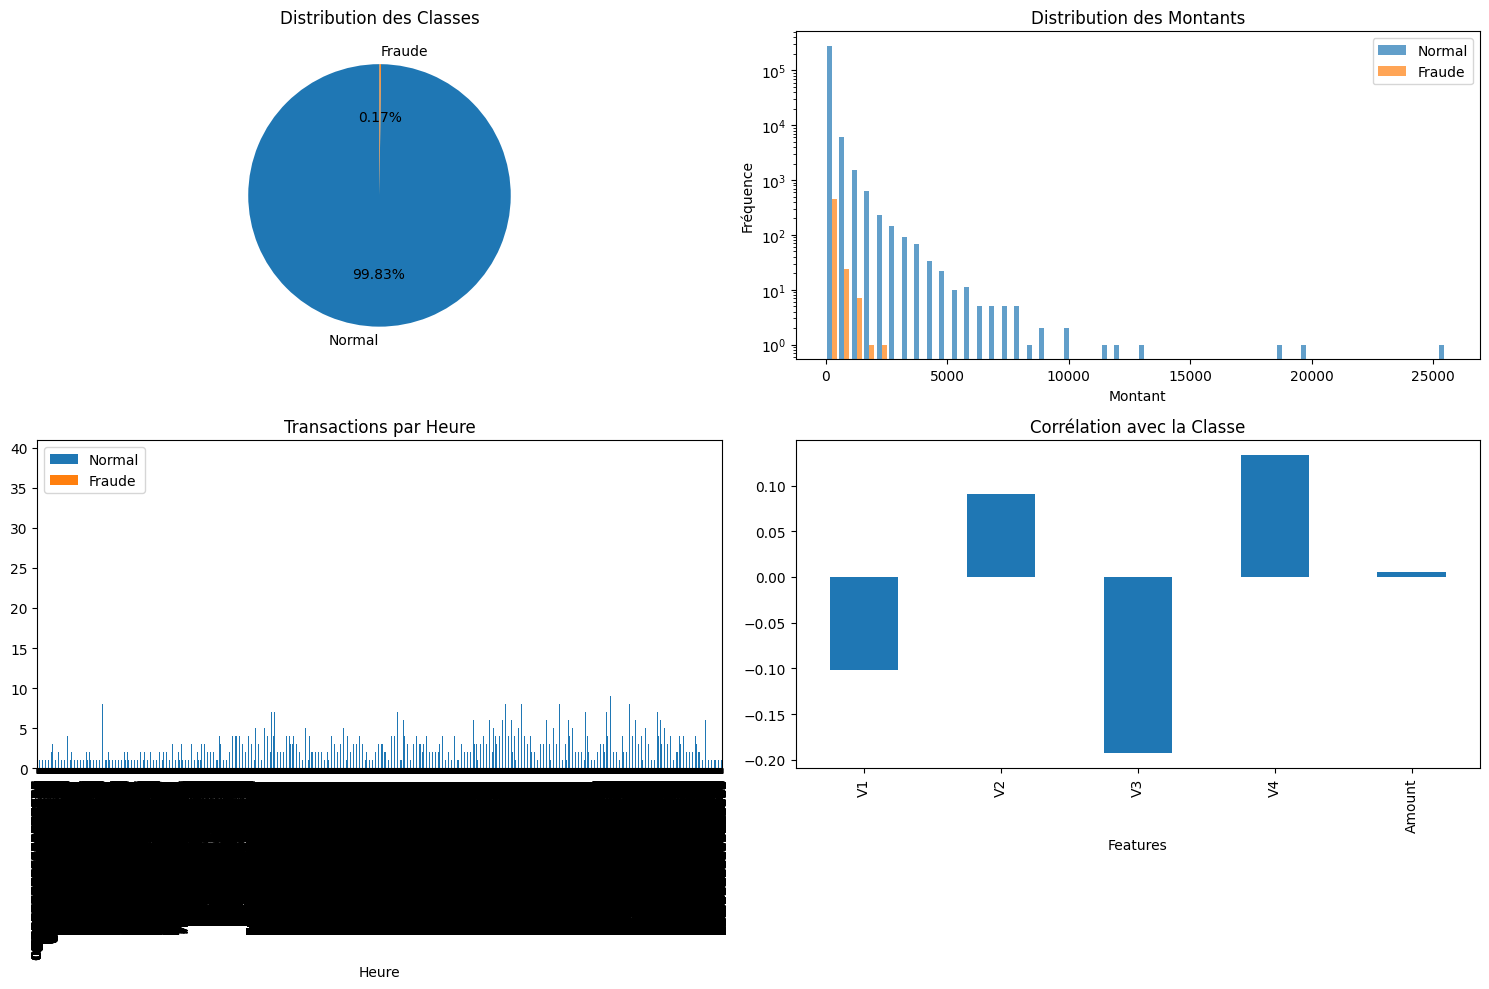


📊 Statistiques par classe:
Transactions normales:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Transactions frauduleuses:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
🔧 Feature Engineering
✅ Features créées! Shape finale: (284807, 37)
Nouvelles features: ['Day', 'Amount_log', 'Amount_scaled', 'V1_V2_interaction', 'V1_Amount_interaction', 'Amount_rolling_mean', 'Amount_rolling_std']
📋 Préparation des données pour ML
Training set: (227845, 37), Fraudes: 417
Test set: (56962, 37), Fraudes: 75
🔄 Cross-Validation Stratifiée Classique
Exécution de la cross-validation stratifiée...

RÉSULTATS CROSS-VALIDATION - XGBoost avec SMOTE - CV Stratifiée
ROC_AUC     : 0.9811 ± 0.0087
P

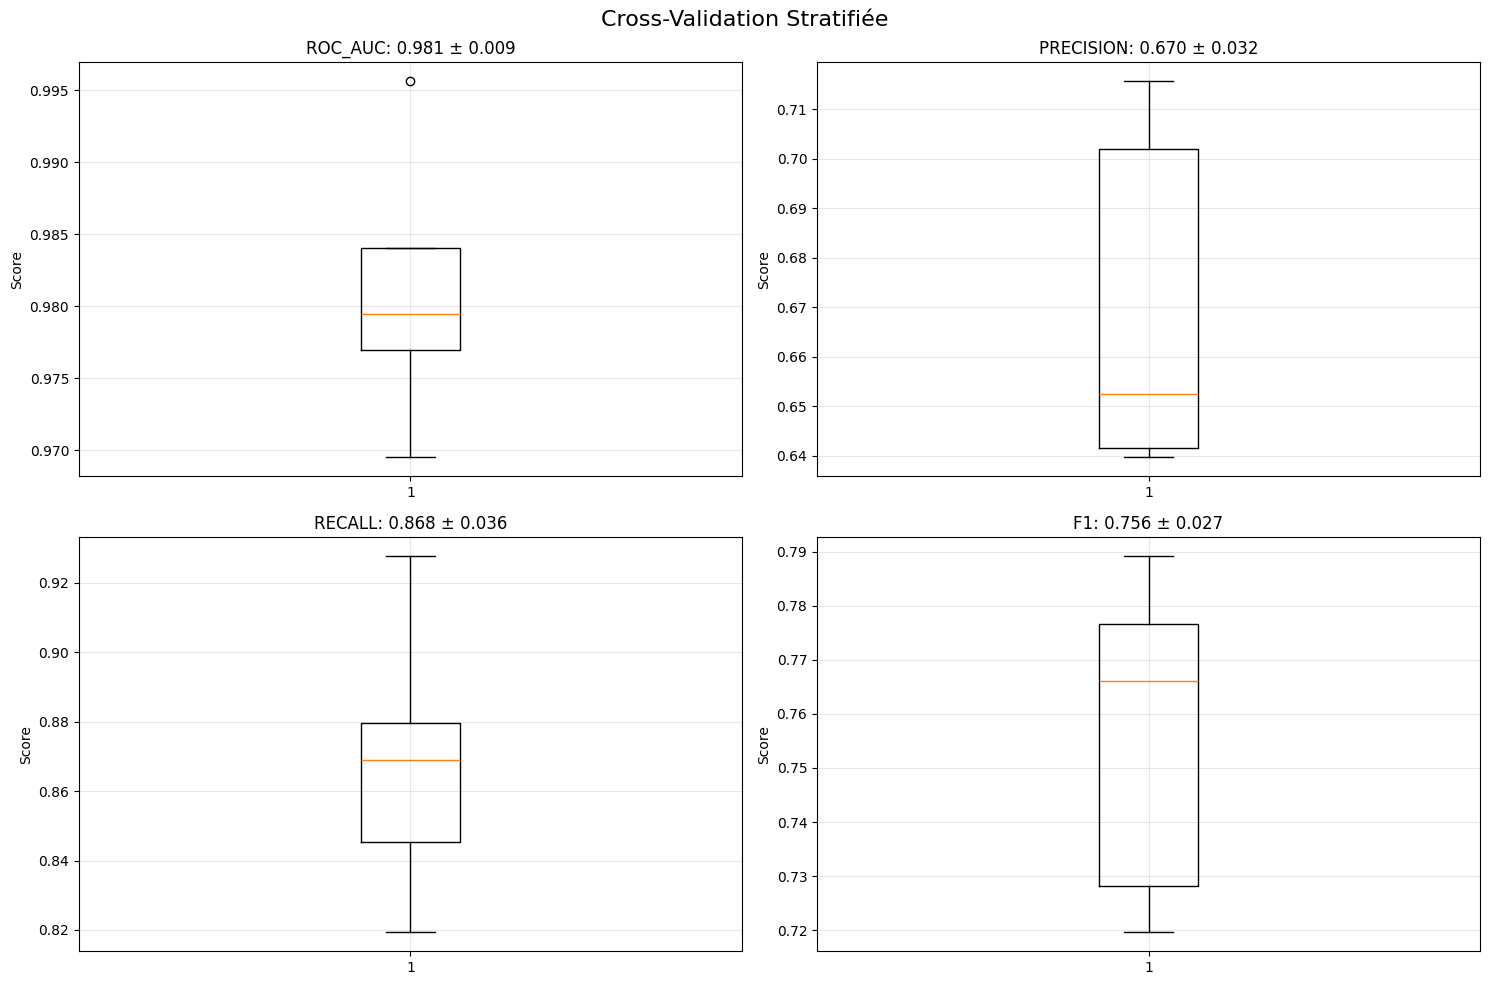

⏰ Cross-Validation Temporelle
Exécution de la cross-validation temporelle...

RÉSULTATS CROSS-VALIDATION - XGBoost avec SMOTE - CV Temporelle
ROC_AUC     : 0.9670 ± 0.0159
PRECISION   : 0.7075 ± 0.2332
RECALL      : 0.8146 ± 0.0576
F1          : 0.7244 ± 0.1577
Temps moyen : 11.90s ± 5.06s


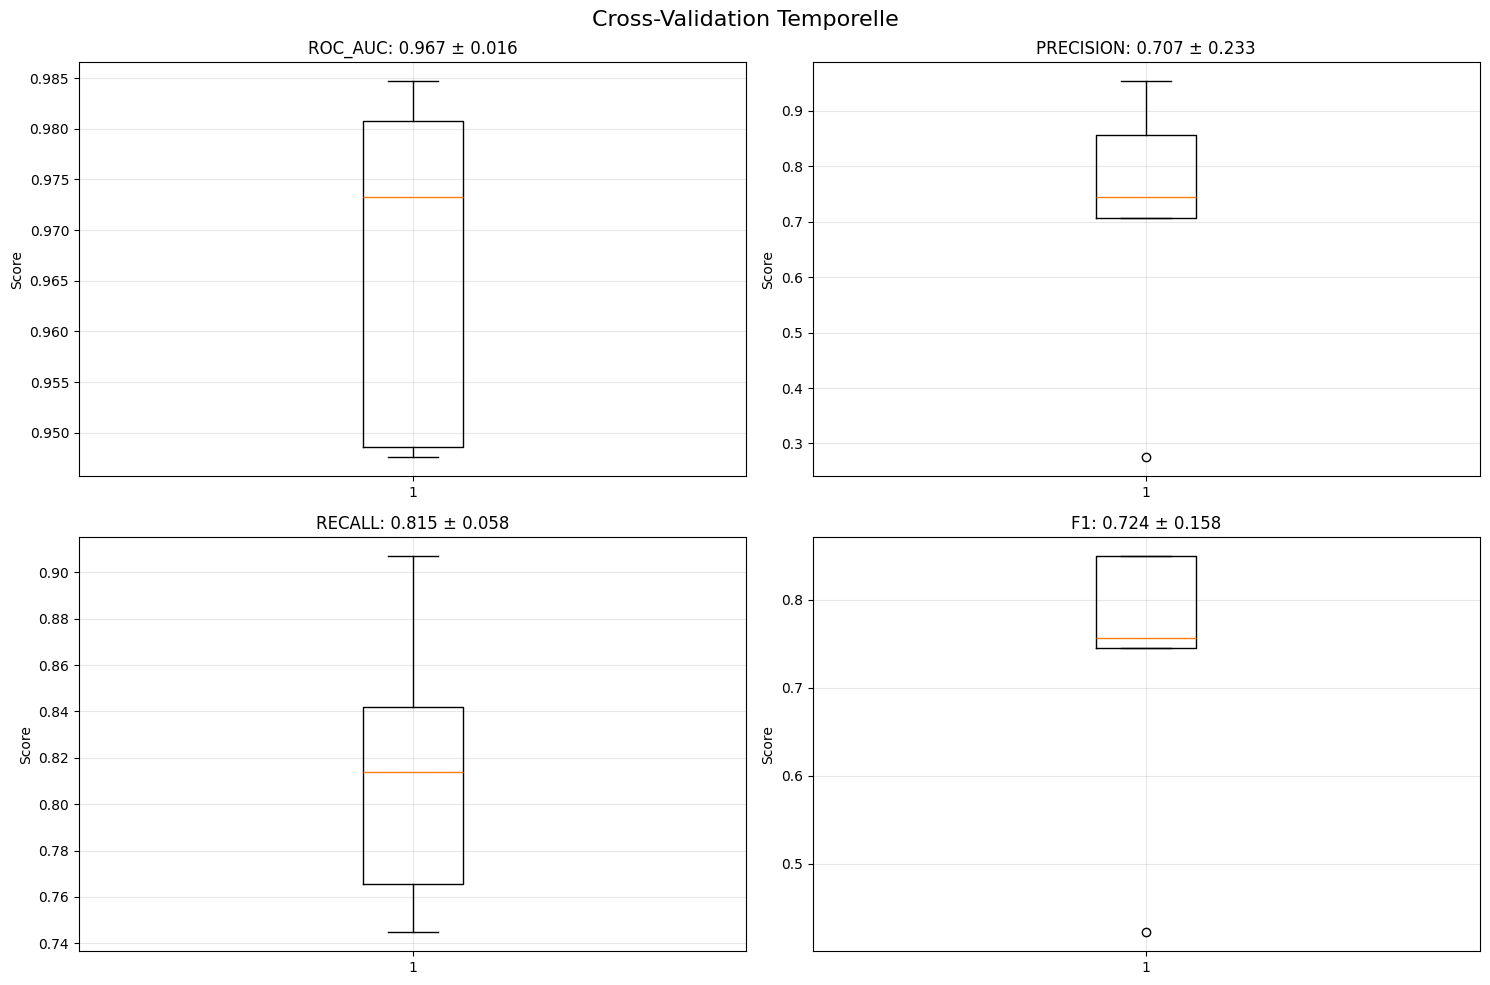

📊 Comparaison des Stratégies de Cross-Validation


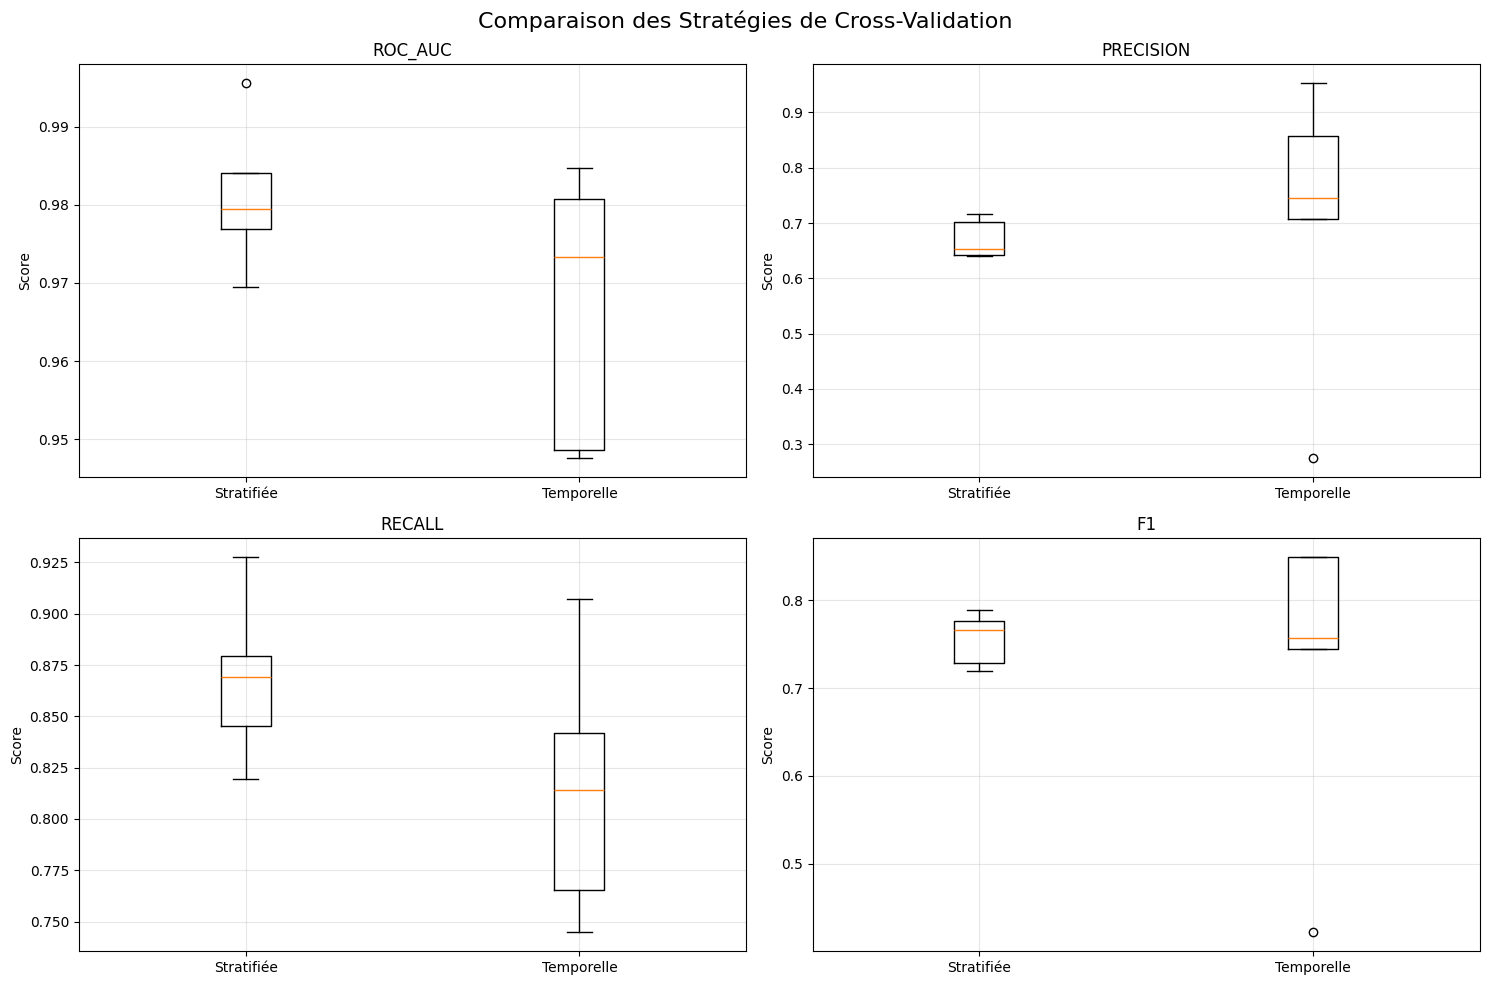


📋 Tableau de Comparaison:
--------------------------------------------------------------------------------
Métrique     Stratifiée           Temporelle           Différence     
--------------------------------------------------------------------------------
ROC_AUC      0.9811 ± 0.0087   0.9670 ± 0.0159   +0.0141
PRECISION    0.6703 ± 0.0321   0.7075 ± 0.2332   -0.0372
RECALL       0.8682 ± 0.0363   0.8146 ± 0.0576   +0.0535
F1           0.7559 ± 0.0273   0.7244 ± 0.1577   +0.0316
🎯 Cross-Validation avec Hyperparameter Tuning
Recherche des meilleurs hyperparamètres...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

🏆 Meilleurs paramètres:
  smote__k_neighbors: 3
  classifier__subsample: 0.8
  classifier__n_estimators: 50
  classifier__max_depth: 3
  classifier__learning_rate: 0.2
  classifier__colsample_bytree: 0.8

📈 Meilleur score ROC-AUC: 0.9823

RÉSULTATS CROSS-VALIDATION - XGBoost Optimisé - CV Stratifiée
ROC_AUC     : 0.9807 ± 0.0074
PRECISION   : 0.2428 ± 0.0124


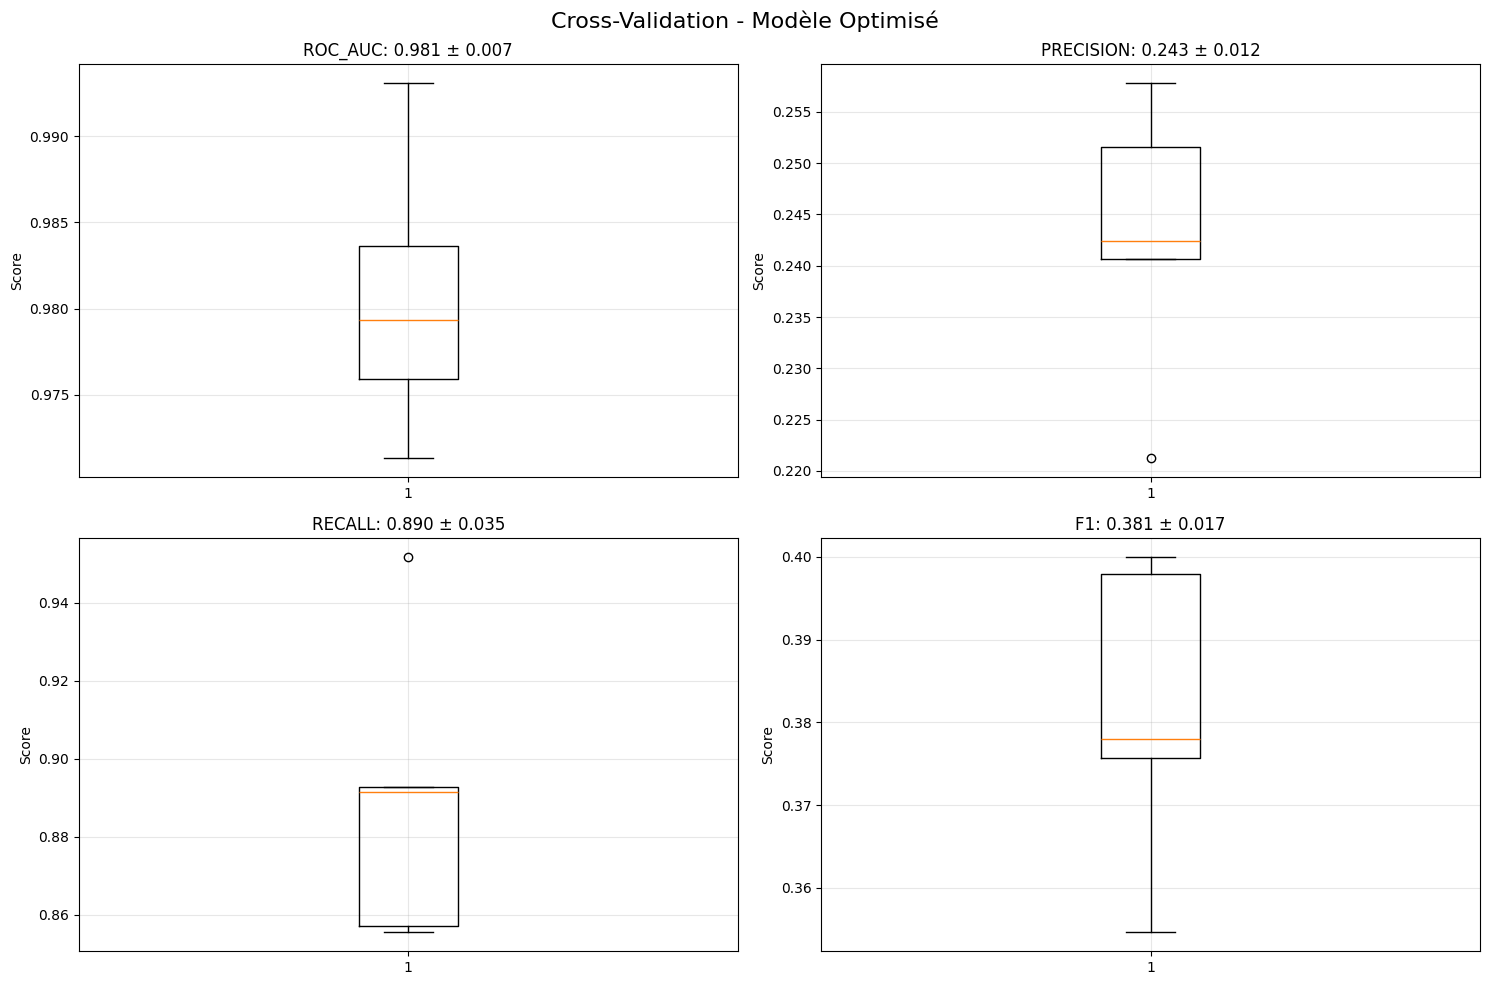

🎯 Validation Finale sur le Set de Test

🏆 PERFORMANCE FINALE:
AUC-ROC:   0.9773
Precision: 0.2585
Recall:    0.8133
F1-Score:  0.3923

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.26      0.81      0.39        75

    accuracy                           1.00     56962
   macro avg       0.63      0.91      0.70     56962
weighted avg       1.00      1.00      1.00     56962



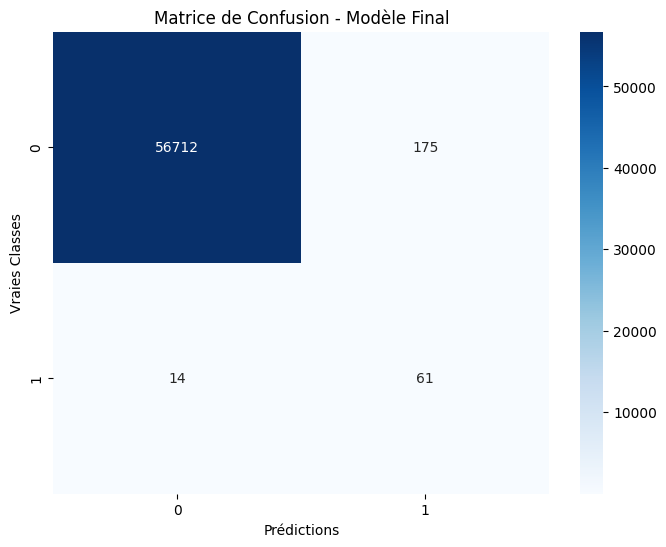

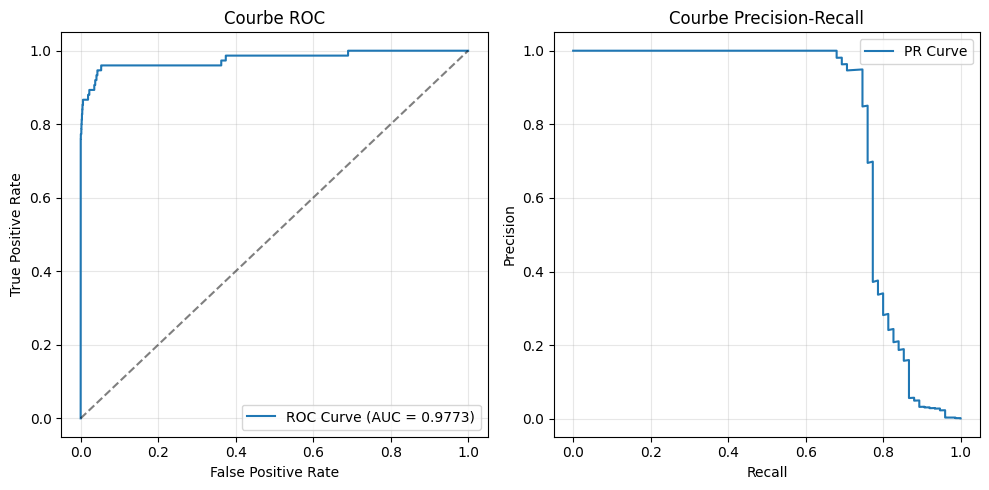


✅ Système de détection de fraudes avec cross-validation complété!
🔍 Le modèle a été évalué avec plusieurs stratégies de validation croisée
🎯 Les hyperparamètres ont été optimisés
📊 Performance finale validée sur données de test


In [ ]:
# =====================================================
# DÉTECTION DE FRAUDES BANCAIRES - GOOGLE COLAB
# Solution Complète avec Cross-Validation
# VERSION OPTIMISÉE - XGBoost et Isolation Forest
# =====================================================

# =============================================================================
# CELLULE 1: SETUP ET INSTALLATION
# =============================================================================

# Installation des packages nécessaires
!pip install -q xgboost imbalanced-learn plotly pyngrok shap

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ML imports
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                   cross_val_score, StratifiedKFold,
                                   TimeSeriesSplit, cross_validate)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           make_scorer, f1_score, precision_score, recall_score)
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb

# Autres
import warnings
warnings.filterwarnings('ignore')
import time
import json

print("✅ Setup terminé!")
print(f"Version XGBoost: {xgb.__version__}")

# =============================================================================
# CELLULE 2: TÉLÉCHARGEMENT ET CHARGEMENT DES DONNÉES
# =============================================================================

# Télécharger le dataset
!wget -q https://github.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/raw/master/creditcard.csv

# Charger les données
print("📊 Chargement des données...")
df = pd.read_csv('creditcard.csv')

print(f"Shape du dataset: {df.shape}")
print(f"Colonnes: {list(df.columns)}")
print(f"Taux de fraude: {df['Class'].mean():.4f} ({df['Class'].sum()} fraudes sur {len(df)} transactions)")

# Aperçu des données
print("\n🔍 Aperçu des données:")
print(df.head())
print(f"\nInformations sur les données:")
print(df.info())

# =============================================================================
# CELLULE 3: ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# =============================================================================

print("📈 Analyse Exploratoire des Données")

# Configuration des graphiques
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribution des classes
axes[0,0].pie([df['Class'].value_counts()[0], df['Class'].value_counts()[1]],
              labels=['Normal', 'Fraude'], autopct='%1.2f%%', startangle=90)
axes[0,0].set_title('Distribution des Classes')

# 2. Distribution des montants
axes[0,1].hist([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']],
               bins=50, alpha=0.7, label=['Normal', 'Fraude'])
axes[0,1].set_xlabel('Montant')
axes[0,1].set_ylabel('Fréquence')
axes[0,1].set_title('Distribution des Montants')
axes[0,1].legend()
axes[0,1].set_yscale('log')

# 3. Transactions par heure
df['Hour'] = (df['Time'] / 3600) % 24
hour_fraud = df.groupby(['Hour', 'Class']).size().unstack(fill_value=0)
hour_fraud.plot(kind='bar', ax=axes[1,0], width=0.8)
axes[1,0].set_title('Transactions par Heure')
axes[1,0].set_xlabel('Heure')
axes[1,0].legend(['Normal', 'Fraude'])

# 4. Corrélation avec quelques features V
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'Amount']
correlation_with_class = df[features_to_plot + ['Class']].corr()['Class'].drop('Class')
correlation_with_class.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Corrélation avec la Classe')
axes[1,1].set_xlabel('Features')

plt.tight_layout()
plt.show()

# Statistiques détaillées
print("\n📊 Statistiques par classe:")
print("Transactions normales:")
print(df[df['Class']==0]['Amount'].describe())
print("\nTransactions frauduleuses:")
print(df[df['Class']==1]['Amount'].describe())

# =============================================================================
# CELLULE 4: FEATURE ENGINEERING
# =============================================================================

print("🔧 Feature Engineering")

# Créer une copie pour le feature engineering
df_features = df.copy()

# 1. Features temporelles
df_features['Hour'] = (df_features['Time'] / 3600) % 24
df_features['Day'] = (df_features['Time'] / (3600 * 24)) % 7

# 2. Transformation des montants
df_features['Amount_log'] = np.log1p(df_features['Amount'])

# Normaliser le montant
scaler = StandardScaler()
df_features['Amount_scaled'] = scaler.fit_transform(df_features[['Amount']])

# 3. Features d'interaction
df_features['V1_V2_interaction'] = df_features['V1'] * df_features['V2']
df_features['V1_Amount_interaction'] = df_features['V1'] * df_features['Amount_scaled']

# 4. Moyennes mobiles simulées
df_features = df_features.sort_values('Time')
df_features['Amount_rolling_mean'] = df_features['Amount'].rolling(window=100, min_periods=1).mean()
df_features['Amount_rolling_std'] = df_features['Amount'].rolling(window=100, min_periods=1).std()

# Créer le dataset final pour ML
feature_columns = [f'V{i}' for i in range(1, 29)] + [
    'Amount', 'Hour', 'Day', 'Amount_log', 'Amount_scaled',
    'V1_V2_interaction', 'V1_Amount_interaction',
    'Amount_rolling_mean', 'Amount_rolling_std'
]

X = df_features[feature_columns].fillna(0)
y = df_features['Class']

print(f"✅ Features créées! Shape finale: {X.shape}")
print(f"Nouvelles features: {[col for col in feature_columns if col not in df.columns]}")

# =============================================================================
# CELLULE 5: PRÉPARATION DES DONNÉES POUR ML
# =============================================================================

print("📋 Préparation des données pour ML")

# Split temporel (pas de shuffle pour garder l'ordre temporel)
split_point = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

print(f"Training set: {X_train.shape}, Fraudes: {y_train.sum()}")
print(f"Test set: {X_test.shape}, Fraudes: {y_test.sum()}")

# =============================================================================
# CELLULE 6: CROSS-VALIDATION - FONCTIONS UTILITAIRES
# =============================================================================

def plot_cv_results(cv_results, title="Résultats Cross-Validation"):
    """Affiche les résultats de cross-validation"""
    metrics = ['roc_auc', 'precision', 'recall', 'f1']

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, metric in enumerate(metrics):
        if f'test_{metric}' in cv_results:
            scores = cv_results[f'test_{metric}']
            axes[i].boxplot(scores)
            axes[i].set_title(f'{metric.upper()}: {scores.mean():.3f} ± {scores.std():.3f}')
            axes[i].set_ylabel('Score')
            axes[i].grid(True, alpha=0.3)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

def print_cv_summary(cv_results, model_name):
    """Affiche un résumé des résultats de CV"""
    print(f"\n{'='*50}")
    print(f"RÉSULTATS CROSS-VALIDATION - {model_name}")
    print(f"{'='*50}")

    metrics = ['roc_auc', 'precision', 'recall', 'f1']
    for metric in metrics:
        if f'test_{metric}' in cv_results:
            scores = cv_results[f'test_{metric}']
            print(f"{metric.upper():<12}: {scores.mean():.4f} ± {scores.std():.4f}")

    print(f"Temps moyen : {cv_results['fit_time'].mean():.2f}s ± {cv_results['fit_time'].std():.2f}s")

# =============================================================================
# CELLULE 7: CROSS-VALIDATION STRATIFIÉE CLASSIQUE
# =============================================================================

print("🔄 Cross-Validation Stratifiée Classique")

# Configuration des métriques
scoring = {
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score, pos_label=1, zero_division=0),
    'recall': make_scorer(recall_score, pos_label=1, zero_division=0),
    'f1': make_scorer(f1_score, pos_label=1, zero_division=0)
}

# Cross-validation stratifiée (5-fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline avec SMOTE et XGBoost
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# Exécuter la cross-validation
print("Exécution de la cross-validation stratifiée...")
cv_results_stratified = cross_validate(
    pipeline, X_train, y_train,
    cv=skf,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Afficher les résultats
print_cv_summary(cv_results_stratified, "XGBoost avec SMOTE - CV Stratifiée")
plot_cv_results(cv_results_stratified, "Cross-Validation Stratifiée")

# =============================================================================
# CELLULE 8: CROSS-VALIDATION TEMPORELLE
# =============================================================================

print("⏰ Cross-Validation Temporelle")

# TimeSeriesSplit pour données temporelles
tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation temporelle
print("Exécution de la cross-validation temporelle...")
cv_results_temporal = cross_validate(
    pipeline, X_train, y_train,
    cv=tscv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Afficher les résultats
print_cv_summary(cv_results_temporal, "XGBoost avec SMOTE - CV Temporelle")
plot_cv_results(cv_results_temporal, "Cross-Validation Temporelle")

# =============================================================================
# CELLULE 9: COMPARAISON DES STRATÉGIES DE CV
# =============================================================================

print("📊 Comparaison des Stratégies de Cross-Validation")

# Comparer les résultats
comparison_data = {
    'Stratifiée': cv_results_stratified,
    'Temporelle': cv_results_temporal
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['roc_auc', 'precision', 'recall', 'f1']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]

    stratified_scores = comparison_data['Stratifiée'][f'test_{metric}']
    temporal_scores = comparison_data['Temporelle'][f'test_{metric}']

    ax.boxplot([stratified_scores, temporal_scores],
               labels=['Stratifiée', 'Temporelle'])
    ax.set_title(f'{metric.upper()}')
    ax.set_ylabel('Score')
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparaison des Stratégies de Cross-Validation', fontsize=16)
plt.tight_layout()
plt.show()

# Tableau de comparaison
print("\n📋 Tableau de Comparaison:")
print("-" * 80)
print(f"{'Métrique':<12} {'Stratifiée':<20} {'Temporelle':<20} {'Différence':<15}")
print("-" * 80)

for metric in metrics:
    strat_mean = comparison_data['Stratifiée'][f'test_{metric}'].mean()
    temp_mean = comparison_data['Temporelle'][f'test_{metric}'].mean()
    diff = strat_mean - temp_mean

    print(f"{metric.upper():<12} {strat_mean:.4f} ± {comparison_data['Stratifiée'][f'test_{metric}'].std():.4f}   "
          f"{temp_mean:.4f} ± {comparison_data['Temporelle'][f'test_{metric}'].std():.4f}   "
          f"{diff:+.4f}")

# =============================================================================
# CELLULE 10: CROSS-VALIDATION AVEC HYPERPARAMETER TUNING
# =============================================================================

print("🎯 Cross-Validation avec Hyperparameter Tuning")

# Grille de paramètres pour RandomizedSearchCV
param_grid = {
    'classifier__max_depth': [3, 4, 5, 6, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'smote__k_neighbors': [3, 5, 7]
}

# RandomizedSearchCV avec cross-validation
print("Recherche des meilleurs hyperparamètres...")
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,  # Nombre d'itérations
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Exécuter la recherche
random_search.fit(X_train, y_train)

print(f"\n🏆 Meilleurs paramètres:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\n📈 Meilleur score ROC-AUC: {random_search.best_score_:.4f}")

# Évaluer le meilleur modèle avec cross-validation complète
best_model = random_search.best_estimator_
cv_results_optimized = cross_validate(
    best_model, X_train, y_train,
    cv=skf,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print_cv_summary(cv_results_optimized, "XGBoost Optimisé - CV Stratifiée")
plot_cv_results(cv_results_optimized, "Cross-Validation - Modèle Optimisé")

# =============================================================================
# CELLULE 11: VALIDATION FINALE ET ÉVALUATION
# =============================================================================

print("🎯 Validation Finale sur le Set de Test")

# Entraîner le meilleur modèle sur tout le training set
best_model.fit(X_train, y_train)

# Prédictions sur le test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Métriques finales
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n🏆 PERFORMANCE FINALE:")
print(f"AUC-ROC:   {auc_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Classification report détaillé
print(f"\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Modèle Final")
plt.xlabel('Prédictions')
plt.ylabel('Vraies Classes')
plt.show()

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.grid(True, alpha=0.3)

# Courbe Precision-Recall
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe Precision-Recall')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Système de détection de fraudes avec cross-validation complété!")
print("🔍 Le modèle a été évalué avec plusieurs stratégies de validation croisée")
print("🎯 Les hyperparamètres ont été optimisés")
print("📊 Performance finale validée sur données de test")